### Analisis sobre tarifas de prepago de un servicio de telefonia movil 
¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

### Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('C:/Users/dell/Desktop/DF SPRINT 5/megaline_users.csv')
calls = pd.read_csv('C:/Users/dell/Desktop/DF SPRINT 5/megaline_calls.csv')
messages = pd.read_csv('C:/Users/dell/Desktop/DF SPRINT 5/megaline_messages.csv')
internet = pd.read_csv('C:/Users/dell/Desktop/DF SPRINT 5/megaline_internet.csv')
plans = pd.read_csv('C:/Users/dell/Desktop/DF SPRINT 5/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
plans.shape

(2, 8)

In [5]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Descripcion general

- En el caso de la tabla de tarifas, es importante hacer cambios en las columnas que muestran costos, ya que considero, es mejor trabajar con numeros enteros en vez de flotantes para evitar confusiones si mas adelante se pretenden utilizar para otros calculos o graficos, tambien se pueden unificar los precios
- Posiblemente sera importante cambiar los mb a gb, por el tamaño de los mb

## Corregir datos

In [6]:
#Cambiamos flotantes a enteros, en este caso, cambiamos las columnas del precio
plans[['usd_per_message','usd_per_minute']] = plans[['usd_per_message','usd_per_minute']]*100
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,3.0,3.0,surf
1,1000,30720,3000,70,7,1.0,1.0,ultimate


In [7]:
plans[['usd_per_message','usd_per_minute']] = plans[['usd_per_message','usd_per_minute']].astype('int64')
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,3,3,surf
1,1000,30720,3000,70,7,1,1,ultimate


### Enriquecer los datos

In [8]:
plans['gb_month_included'] = plans['mb_per_month_included']/1024
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included
0,50,15360,500,20,10,3,3,surf,15.0
1,1000,30720,3000,70,7,1,1,ultimate,30.0


## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios

users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaN
234,1234,Matt,Taylor,19,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-12,ultimate,NaN
146,1146,Loma,Mcneil,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-13,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
483,1483,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaN


**Descripion de dF users**

En este caso a diferencia del primer df, es que en este, en principio, cuenta con mas filas

- Cuenta con 500 filas totales

- En la columna 'churn_date'(fecha de salida, o fecha de baja del plan), se observa que existen datos nulos, alrededor de un 90% de los datos de esa columna esta vacia, lo que podria sugerir en un momento prescindir de esa columna y eliminarla, ya que son muy pocos datos los que contiene o colocarlos como desconocidos en caso de requerir informacion sobre la fecha de cuando dejaron de usar el servicio

- Cuenta con datos de fecha mismos que pueden ser cambiados, ya que el tipo de dato es object y eso puede incidir en varios detalles como mayor consumo de memoria, asi como ser incompatible con algunas funciones de pandas, entre ellas, los graficos por ejemplo

### Corregir los datos

In [11]:
#Cambio de formato fecha
users ['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


* Se aplica el conteo de valores nulos en la columna churn_date, para saber cuantos datos estan disponibles, con base en ello identificar que hacer con esos datos

In [12]:
users_sin_na = users[users['churn_date'].notna()]
users_agrupados = users_sin_na.groupby(['churn_date'])
conteo_sin_na = users_agrupados.size()
conteo_sin_na.sort_values(ascending = False)

churn_date
2018-12-18    3
2018-12-31    2
2018-12-19    2
2018-11-14    2
2018-11-21    1
2018-12-30    1
2018-12-27    1
2018-12-26    1
2018-12-22    1
2018-12-15    1
2018-12-12    1
2018-12-10    1
2018-11-30    1
2018-11-29    1
2018-11-24    1
2018-07-31    1
2018-08-16    1
2018-11-16    1
2018-11-11    1
2018-10-22    1
2018-10-13    1
2018-10-07    1
2018-10-03    1
2018-09-18    1
2018-09-17    1
2018-09-07    1
2018-09-01    1
2018-08-19    1
2018-11-18    1
dtype: int64

Una vez identificados los datos se rellenan como desconocidos, se mantienen por si se necesitan mas adelante, de lo contrario de se estaria eliminando la columna

In [13]:
users ['churn_date'] = users['churn_date'].fillna('unknomwn')
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,unknomwn
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknomwn
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,unknomwn
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,unknomwn
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,unknomwn
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,unknomwn
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,unknomwn
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,unknomwn
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,unknomwn


Cambiamos el formato de columna reg_date a formato fecha

In [14]:
users ['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
487,1487,Elton,Simpson,18,"Cape Coral-Fort Myers, FL MSA",2018-08-16,ultimate,unknomwn
123,1123,Dierdre,Nash,66,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-04-19,surf,unknomwn
390,1390,Deloras,Strickland,61,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-03-11,ultimate,unknomwn
109,1109,Dominic,Salinas,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-16,surf,unknomwn
476,1476,Tammara,Dorsey,24,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-10,ultimate,unknomwn
425,1425,Latrisha,Larsen,19,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-20,surf,unknomwn
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,unknomwn
460,1460,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,unknomwn
357,1357,Ria,Beach,61,"Baton Rouge, LA MSA",2018-05-30,surf,unknomwn
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,unknomwn


### Enriquecer los datos

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Llamadas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprime una muestra de datos para las llamadas

calls.sample(10)

,id,user_id,call_date,duration
47316,1171_347,1171,2018-07-28,5.01
40851,1151_29,1151,2018-09-13,2.35
44088,1160_104,1160,2018-05-27,0.00
105230,1370_486,1370,2018-12-18,11.23
6839,1031_735,1031,2018-08-05,0.00
83096,1301_10,1301,2018-12-21,17.58
35043,1132_401,1132,2018-07-16,14.23
63650,1231_364,1231,2018-08-05,0.00
47674,1172_265,1172,2018-08-31,0.00
44732,1161_243,1161,2018-12-09,0.00


In [18]:
calls['id'].sort_values().head(10) #al parecer no cuenta con datos duplicados, al ser un identificador unico, indica el numero de llamada x usuario

1     1000_145
2     1000_247
3     1000_309
4     1000_380
5     1000_388
6     1000_510
7     1000_521
8     1000_530
9     1000_544
10    1000_693
Name: id, dtype: object

En este caso, el formato de id se encuentra en entero, y con un separador de guion bajo, lo que se puede hacer es depurar la columna, separando los valores de user quedando solo el numero de llamada de los usuarios, y posteriormente podremos eliminar la columna nueva con usuario

La duracion como flotante, podriamos considerar cambiarla a entero, pero dependera para que se requiera mas adelante, ya que muestra los datos en minutos y tal vez sea prudente cambiar a int para que cuando se utilicen los datos de otros df se puedan esandarizar y en algun momento no cause conflicto por si se requiere realizar calculos

la fecha de call_date, se puede cambiar a formato fecha, para estandarizar los datos con las demas tablas y en algun momento, si se requiere, poder trabajarlas en conjunto

Se puede separar el id del usuario, posteriormente, solo quedarnos con el numero de llamdas por usuario, sin necesidad de tener un numero duplicado como es el usuario, ademas por formato, mientras mas limpios tengamos los datos se pueden procesar mejor

### Corregir los datos

Cambiar formato fecha
separar columna id (separar y eliminar sobrantes)

In [19]:
# Se reasigna en otra variable para hacer cambios
calls_1 = calls
calls_1

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [20]:
#Se crea una nueva columna con los valores separados para quitar guion bajo y evitar tener duplicada la columna de users con user_id
calls_1[['user','call_id']] = calls_1['id'].str.split('_',expand=True)
calls_1

,id,user_id,call_date,duration,user,call_id
0,1000_93,1000,2018-12-27,8.52,1000,93
1,1000_145,1000,2018-12-27,13.66,1000,145
2,1000_247,1000,2018-12-27,14.48,1000,247
3,1000_309,1000,2018-12-28,5.76,1000,309
4,1000_380,1000,2018-12-30,4.22,1000,380
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,1499,199
137731,1499_200,1499,2018-10-20,10.89,1499,200
137732,1499_201,1499,2018-09-21,8.12,1499,201
137733,1499_202,1499,2018-10-10,0.37,1499,202


In [21]:
#Eliminamos columnas nos quedamos solo con las que nos pueden funcionar
eliminar_col = ['id', 'user']
calls_1 = calls_1.drop(columns=eliminar_col)
calls_1

,user_id,call_date,duration,call_id
0,1000,2018-12-27,8.52,93
1,1000,2018-12-27,13.66,145
2,1000,2018-12-27,14.48,247
3,1000,2018-12-28,5.76,309
4,1000,2018-12-30,4.22,380
...,...,...,...,...
137730,1499,2018-11-21,8.72,199
137731,1499,2018-10-20,10.89,200
137732,1499,2018-09-21,8.12,201
137733,1499,2018-10-10,0.37,202


In [22]:
#Cambiamos el formato de fecha de la columna call date
calls_1['call_date']= pd.to_datetime(calls_1['call_date'], format = '%Y-%m-%d')
calls_1

,user_id,call_date,duration,call_id
0,1000,2018-12-27,8.52,93
1,1000,2018-12-27,13.66,145
2,1000,2018-12-27,14.48,247
3,1000,2018-12-28,5.76,309
4,1000,2018-12-30,4.22,380
...,...,...,...,...
137730,1499,2018-11-21,8.72,199
137731,1499,2018-10-20,10.89,200
137732,1499,2018-09-21,8.12,201
137733,1499,2018-10-10,0.37,202


In [23]:
#Podemos cambiar los datos de duration a enteros
calls_1 ['duration'] = calls_1 ['duration'].astype(int)
calls_1

,user_id,call_date,duration,call_id
0,1000,2018-12-27,8,93
1,1000,2018-12-27,13,145
2,1000,2018-12-27,14,247
3,1000,2018-12-28,5,309
4,1000,2018-12-30,4,380
...,...,...,...,...
137730,1499,2018-11-21,8,199
137731,1499,2018-10-20,10,200
137732,1499,2018-09-21,8,201
137733,1499,2018-10-10,0,202


### Enriquecer los datos

No considero agregar mas modificaciones

## Mensajes

In [24]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
# Imprime una muestra de datos para los mensajes
messages.sample(10)

,id,user_id,message_date
17560,1114_565,1114,2018-12-26
66836,1434_388,1434,2018-12-05
72092,1467_424,1467,2018-12-21
40448,1261_80,1261,2018-08-22
468,1004_145,1004,2018-06-04
47404,1324_117,1324,2018-08-15
50931,1331_106,1331,2018-09-21
55464,1348_394,1348,2018-11-26
5582,1053_40,1053,2018-12-03
29808,1183_203,1183,2018-12-22


-El formato de id contiene los mismos datos de user_id en conjunto con el numero de mensajes de cada usuario, de igual manera se puede solo dejar el numero de mensajes por usuario para evitar tener duplicidad en las columnas y sean mas legibles los datos

-Podemos cambiar el formato de fecha de mensajes

-No se observa en la descirpcion que existan datos nulos

### Corregir los datos

In [26]:
messages_1 = messages
messages_1

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [27]:
messages_1[['user', 'id_msg']] = messages_1['id'].str.split('_',expand=True)
messages_1

,id,user_id,message_date,user,id_msg
0,1000_125,1000,2018-12-27,1000,125
1,1000_160,1000,2018-12-31,1000,160
2,1000_223,1000,2018-12-31,1000,223
3,1000_251,1000,2018-12-27,1000,251
4,1000_255,1000,2018-12-26,1000,255
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,1497,526
76047,1497_536,1497,2018-12-24,1497,536
76048,1497_547,1497,2018-12-31,1497,547
76049,1497_558,1497,2018-12-24,1497,558


In [28]:
#Eliminamos columnas excedentes y solo nos quedamos con las que se utilizaran, para evitar tener columnas duplicadas y confusion
messages_1 = messages_1.drop(columns=['id','user'])
messages_1

,user_id,message_date,id_msg
0,1000,2018-12-27,125
1,1000,2018-12-31,160
2,1000,2018-12-31,223
3,1000,2018-12-27,251
4,1000,2018-12-26,255
...,...,...,...
76046,1497,2018-12-24,526
76047,1497,2018-12-24,536
76048,1497,2018-12-31,547
76049,1497,2018-12-24,558


In [29]:
#Cambiamos a formato fecha la columna message_date
messages_1['message_date']= pd.to_datetime(messages_1['message_date'], format = '%Y-%m-%d')
messages_1

,user_id,message_date,id_msg
0,1000,2018-12-27,125
1,1000,2018-12-31,160
2,1000,2018-12-31,223
3,1000,2018-12-27,251
4,1000,2018-12-26,255
...,...,...,...
76046,1497,2018-12-24,526
76047,1497,2018-12-24,536
76048,1497,2018-12-31,547
76049,1497,2018-12-24,558


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [30]:
#Se podria cambiar el nombre de las columnas para que queden como estaban originalmente, sin embargo, algunas de las demas tablas tienen el mismo de id
renombrar_id = {'id':'id_msg'}
messages_1.rename(columns = renombrar_id, inplace = True)
messages_1

,user_id,message_date,id_msg
0,1000,2018-12-27,125
1,1000,2018-12-31,160
2,1000,2018-12-31,223
3,1000,2018-12-27,251
4,1000,2018-12-26,255
...,...,...,...
76046,1497,2018-12-24,526
76047,1497,2018-12-24,536
76048,1497,2018-12-31,547
76049,1497,2018-12-24,558


## Internet

In [31]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [33]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10)
#Cuenta con datos de consumo en megas en flotante, podemos cambiarlos a enteros para trabajar mejor con ellos, ya que la compania los considera
#como numeros redondos para realizar el cobro

,id,user_id,session_date,mb_used
27830,1127_672,1127,2018-11-21,282.27
19706,1088_560,1088,2018-10-04,92.27
28815,1132_239,1132,2018-12-22,94.55
33119,1150_1,1150,2018-11-30,381.70
90706,1417_391,1417,2018-11-25,1117.00
3032,1017_69,1017,2018-11-03,225.18
41195,1185_232,1185,2018-05-10,263.47
87915,1406_232,1406,2018-09-03,460.58
27938,1128_92,1128,2018-11-09,189.03
13331,1062_301,1062,2018-08-02,340.38


**Descripcion de datos**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [34]:
#Corregir la fecha, int a mb y quitar usuario dejar solo id
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet.sample(10)

,id,user_id,session_date,mb_used
10970,1054_509,1054,2018-09-10,502.20
16902,1077_22,1077,2018-06-15,112.87
55098,1249_364,1249,2018-05-16,124.14
95613,1446_42,1446,2018-11-15,1096.23
52075,1233_155,1233,2018-12-01,585.37
91523,1422_54,1422,2018-12-09,583.03
87656,1405_531,1405,2018-10-06,470.21
100761,1477_76,1477,2018-11-07,0.00
43342,1193_147,1193,2018-08-02,218.16
40190,1181_364,1181,2018-10-30,74.65


In [35]:
internet_1 = internet

In [36]:
#Separamos columna id, para dejar solo user y no copnfundir
internet_1[['user', 'id_internet']] = internet_1['id'].str.split('_',expand=True)
internet_1

,id,user_id,session_date,mb_used,user,id_internet
0,1000_13,1000,2018-12-29,89.86,1000,13
1,1000_204,1000,2018-12-31,0.00,1000,204
2,1000_379,1000,2018-12-28,660.40,1000,379
3,1000_413,1000,2018-12-26,270.99,1000,413
4,1000_442,1000,2018-12-27,880.22,1000,442
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,1499,215
104821,1499_216,1499,2018-12-30,304.72,1499,216
104822,1499_217,1499,2018-09-22,292.75,1499,217
104823,1499_218,1499,2018-12-07,0.00,1499,218


In [37]:
internet_1 = internet_1.drop(columns = ['id', 'user'])
internet_1

,user_id,session_date,mb_used,id_internet
0,1000,2018-12-29,89.86,13
1,1000,2018-12-31,0.00,204
2,1000,2018-12-28,660.40,379
3,1000,2018-12-26,270.99,413
4,1000,2018-12-27,880.22,442
...,...,...,...,...
104820,1499,2018-10-20,218.06,215
104821,1499,2018-12-30,304.72,216
104822,1499,2018-09-22,292.75,217
104823,1499,2018-12-07,0.00,218


### Enriquecer los datos

In [38]:
#Cambiamos los valores flotantes a enteros de la columna mb
internet_1['mb_used'] = internet_1 ['mb_used'].astype(int)
internet_1

,user_id,session_date,mb_used,id_internet
0,1000,2018-12-29,89,13
1,1000,2018-12-31,0,204
2,1000,2018-12-28,660,379
3,1000,2018-12-26,270,413
4,1000,2018-12-27,880,442
...,...,...,...,...
104820,1499,2018-10-20,218,215
104821,1499,2018-12-30,304,216
104822,1499,2018-09-22,292,217
104823,1499,2018-12-07,0,218


## Estudiar las condiciones de las tarifas

In [39]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      int64  
 6   usd_per_minute         2 non-null      int64  
 7   plan_name              2 non-null      object 
 8   gb_month_included      2 non-null      float64
dtypes: float64(1), int64(7), object(1)
memory usage: 276.0+ bytes


In [40]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included
0,50,15360,500,20,10,3,3,surf,15.0
1,1000,30720,3000,70,7,1,1,ultimate,30.0


## Agregar datos por usuario

In [41]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_1.head(10)

,user_id,call_date,duration,call_id
0,1000,2018-12-27,8,93
1,1000,2018-12-27,13,145
2,1000,2018-12-27,14,247
3,1000,2018-12-28,5,309
4,1000,2018-12-30,4,380
5,1000,2018-12-31,2,388
6,1000,2018-12-27,5,510
7,1000,2018-12-28,14,521
8,1000,2018-12-28,5,530
9,1000,2018-12-26,4,544


In [42]:
#Separamos por mes con base en la fecha de las llamadas
calls_1['month'] = calls_1['call_date'].dt.month
calls_1

,user_id,call_date,duration,call_id,month
0,1000,2018-12-27,8,93,12
1,1000,2018-12-27,13,145,12
2,1000,2018-12-27,14,247,12
3,1000,2018-12-28,5,309,12
4,1000,2018-12-30,4,380,12
...,...,...,...,...,...
137730,1499,2018-11-21,8,199,11
137731,1499,2018-10-20,10,200,10
137732,1499,2018-09-21,8,201,9
137733,1499,2018-10-10,0,202,10


In [43]:
#Agrupamos por usuario y por mes y realizamos conteo de llamadas por usuario
calls_month_user = calls_1.groupby(['user_id', 'month'])['call_id'].count().reset_index(name='calls_user')
calls_month_user.head()

,user_id,month,calls_user
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [44]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_1['month'] = calls_1['call_date'].dt.month #Extraemos la columna de fecha
#agrupamos por usuario y mes, sumamos la duracion y renombramos
minutes_month_users = calls_1.groupby(['user_id','month'])['duration'].sum().reset_index(name='minutes')
minutes_month_users.head()

,user_id,month,minutes
0,1000,12,108
1,1001,8,160
2,1001,9,278
3,1001,10,348
4,1001,11,379


In [45]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_1['month'] = messages_1['message_date'].dt.month
#agrupamos por usuario y mes, contamos cantidad de mensajes y renombramos
messages_month = messages_1.groupby(['user_id','month'])['id_msg'].count().reset_index(name='messages')
messages_month.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [46]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_1['month'] = internet_1['session_date'].dt.month
internet_month = (internet_1.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='mb'))
internet_month.head()

,user_id,month,mb
0,1000,12,1899
1,1001,8,6908
2,1001,9,13294
3,1001,10,22308
4,1001,11,18477


**Fusionamos dF para conocer los datos de llamadas, mensajes e internet en una sola tabla**

In [47]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merge_1 = pd.merge(calls_month_user, minutes_month_users, on = ['user_id', 'month'], how = 'inner')
merge_2 = pd.merge(merge_1, messages_month, on= ['user_id', 'month'], how = 'inner')
df_filtrado = pd.merge(merge_2, internet_month, on = ['user_id', 'month'], how = 'inner')
df_filtrado.sample(10)

,user_id,month,calls_user,minutes,messages,mb
1004,1268,9,74,413,42,24680
195,1061,11,68,396,56,18728
296,1086,12,46,295,74,24750
1165,1326,8,137,916,71,10449
656,1182,8,27,182,2,19012
1401,1384,11,35,176,73,18761
133,1046,10,81,515,27,25805
1311,1361,12,53,460,49,17375
1391,1382,11,150,993,66,9990
1123,1313,7,73,354,46,17679


In [48]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included
0,50,15360,500,20,10,3,3,surf,15.0
1,1000,30720,3000,70,7,1,1,ultimate,30.0


In [49]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,unknomwn
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknomwn
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,unknomwn
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,unknomwn
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,unknomwn


**Fusionamos datos de planes tarifarios con usuarios**

In [50]:
#Añade la informacion de la tarifa
consumo_mensual = pd.merge(users[['user_id','plan']], df_filtrado, on= ['user_id'], how='inner')
consumo_mensual.head()

,user_id,plan,month,calls_user,minutes,messages,mb
0,1000,ultimate,12,16,108,11,1899
1,1001,surf,8,27,160,30,6908
2,1001,surf,9,49,278,44,13294
3,1001,surf,10,65,348,53,22308
4,1001,surf,11,64,379,36,18477


Se hace un merge, para fusionar las tablas de consumo mensual y plans, con la finalidad de tener todas las columnas en una sola tabla y tener una comparativa de los valores que queremos conocer

In [51]:
consumo_mensual_plan = pd.merge(consumo_mensual, plans, left_on= ['plan'], right_on = ['plan_name'], how='inner')

In [52]:
consumo_mensual_plan.head()

,user_id,plan,month,calls_user,minutes,messages,mb,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included
0,1000,ultimate,12,16,108,11,1899,1000,30720,3000,70,7,1,1,ultimate,30.0
1,1001,surf,8,27,160,30,6908,50,15360,500,20,10,3,3,surf,15.0
2,1001,surf,9,49,278,44,13294,50,15360,500,20,10,3,3,surf,15.0
3,1001,surf,10,65,348,53,22308,50,15360,500,20,10,3,3,surf,15.0
4,1001,surf,11,64,379,36,18477,50,15360,500,20,10,3,3,surf,15.0


Se realiza una funcion que permita conocer el excedente en minutos, al recorrer toda la tabla con base en los minutos incluidos y totales, se utiliza limite (minutos incluidos) y total(minutos consumidos), si el total es menor o igual al limite de minutos, entonces retorna 0, quiere decir que no existe excedente en el consumo, por el contrario si es mayor, entonces a total (minutos consumidos) se le resta el limite(minutos incluidos)

In [53]:
#minutos excedentes
def calculo_excedente (row):
    limite=row['minutes_included']
    total=row['minutes']
    if total<=limite:
        return 0
    else:
        return total-limite

Una vez obtenido el valor excedente para minutos, se procede a conocer el costo total del excedente, con base en los minutos excedidos sobre el plan
Se utiliza el data frame consumo_mensual_plan, se agrega la columna donde se multiplica el excedente en minutos por el costo x minuto, se imprime 

In [54]:
consumo_mensual_plan['excedente_minutos'] = consumo_mensual_plan.apply(calculo_excedente, axis=1)
consumo_mensual_plan['costo_excedente_minutos'] = consumo_mensual_plan['excedente_minutos'] * consumo_mensual_plan['usd_per_minute']
display(consumo_mensual_plan[['minutes', 'minutes_included', 'excedente_minutos', 'usd_per_minute', 'costo_excedente_minutos']].sample(10))

,minutes,minutes_included,excedente_minutos,usd_per_minute,costo_excedente_minutos
1645,343,3000,0,1,0
1060,546,500,46,3,138
1591,358,3000,0,1,0
825,468,3000,0,1,0
67,60,3000,0,1,0
477,192,500,0,3,0
329,128,500,0,3,0
9,987,500,487,3,1461
149,130,500,0,3,0
1512,377,3000,0,1,0


In [55]:
#Mensajes excedentes
def calculo_excedente (row):
    limite=row['messages_included']
    total=row['messages']
    if total<=limite:
        return 0
    else:
        return total-limite

In [56]:
consumo_mensual_plan['excedente_mensajes'] = consumo_mensual_plan.apply(calculo_excedente, axis=1)
consumo_mensual_plan['costo_excedente_mensajes'] = consumo_mensual_plan['excedente_mensajes'] * consumo_mensual_plan['usd_per_message']
display(consumo_mensual_plan[['messages', 'messages_included', 'excedente_mensajes', 'usd_per_message', 'costo_excedente_mensajes']].sample(10))

,messages,messages_included,excedente_mensajes,usd_per_message,costo_excedente_mensajes
1034,55,50,5,3,15
215,29,50,0,3,0
1111,3,50,0,3,0
356,106,50,56,3,168
807,12,50,0,3,0
260,63,1000,0,1,0
1106,4,50,0,3,0
136,7,1000,0,1,0
675,43,1000,0,1,0
455,42,1000,0,1,0


In [57]:
#Internet excedente
def calculo_excedente (row):
    limite=row['mb_per_month_included']
    total=row['mb']
    if total<=limite:
        return 0
    else:
        return total-limite

In [58]:
#Cambiar gb a megas, para unificar unidades
consumo_mensual_plan['excedente_gb'] = consumo_mensual_plan.apply(calculo_excedente, axis=1)
consumo_mensual_plan['costo_excedente_gb'] = consumo_mensual_plan['excedente_gb'] * consumo_mensual_plan['usd_per_gb']
display(consumo_mensual_plan[['mb', 'mb_per_month_included', 'excedente_gb', 'usd_per_gb', 'costo_excedente_gb']].sample(10))

,mb,mb_per_month_included,excedente_gb,usd_per_gb,costo_excedente_gb
795,12167,15360,0,10,0
1464,22895,30720,0,7,0
531,19858,15360,4498,10,44980
1611,14688,30720,0,7,0
507,17311,15360,1951,10,19510
1644,24945,30720,0,7,0
1705,8218,30720,0,7,0
428,17749,15360,2389,10,23890
1332,18275,15360,2915,10,29150
1110,21491,15360,6131,10,61310


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Gran comienzo de proyecto. Has realizado una limpieza y transformación exhaustiva de todos los conjuntos de datos, mostrando un enfoque ordenado y estructurado para preparar la información antes del análisis. </div>

## Estudia el comportamiento de usuario

### Llamadas

In [59]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Calcula la duración promedio de llamadas por plan y mes
from matplotlib import pyplot as plt

duracion_promedio_plan_mes = consumo_mensual_plan.groupby(['plan', 'month'])['minutes'].mean().reset_index()
#duracion_promedio_plan_mes.rename(columns={'minutes': 'duracion_promedio'}, inplace=True)

display(duracion_promedio_plan_mes)

,plan,month,minutes
0,surf,1,258.000000
1,surf,2,295.400000
2,surf,3,305.625000
3,surf,4,325.314286
4,surf,5,394.547170
5,surf,6,378.157143
6,surf,7,401.269663
7,surf,8,380.521008
8,surf,9,378.557823
9,surf,10,392.983425


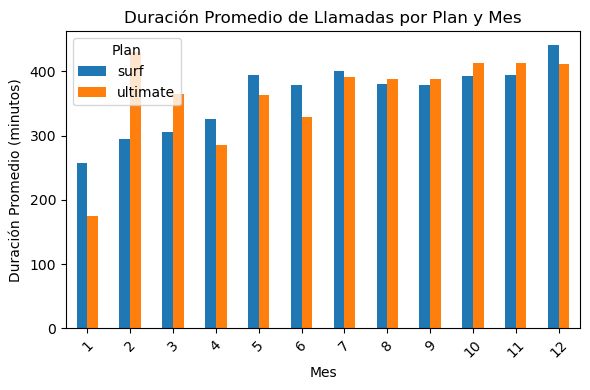

In [60]:
# Crear el gráfico de barras agrupadas
duracion_promedio_plan_mes.pivot(index='month', columns='plan', values='minutes').plot(
    kind='bar',
    figsize=(6, 4),
    title='Duración Promedio de Llamadas por Plan y Mes',
    xlabel='Mes',
    ylabel='Duración Promedio (minutos)',
    rot=45  # Rotar las etiquetas del eje x para mejor legibilidad
)

plt.legend(title='Plan')
plt.tight_layout()
plt.show()

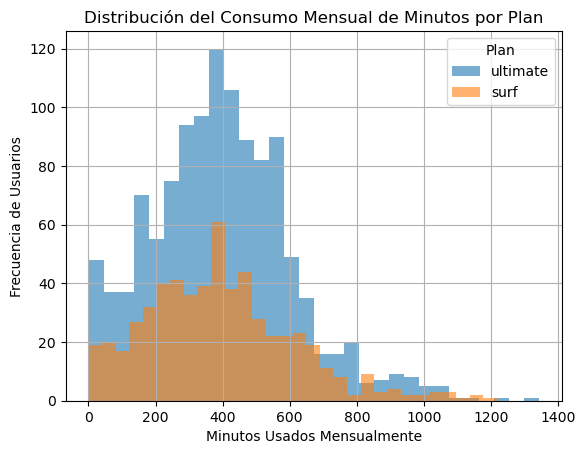

In [61]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
consumo_mensual_plan.groupby('plan')['minutes'].hist(bins=30, alpha=0.6)
plt.title('Distribución del Consumo Mensual de Minutos por Plan')
plt.xlabel('Minutos Usados Mensualmente')
plt.ylabel('Frecuencia de Usuarios')
plt.legend(consumo_mensual_plan['plan'].unique(), title='Plan')
plt.show()

**Media y varianza**

Para calcular la media y la varianza de la duración mensual de llamadas, necesitamos el DF con la columna que representa la duración total de las llamadas por usuario en cada mes. Utilizaremos el DataFrame llamado consumo_mensual en su columna 'minutes' (duracion de llamadas) y la columna month (mes) para agrupar por mes, asi aplicar el promedio a la duracion de llamadas sobre el mes, reseteamos indice y colocamos nueva columna con el resultado del promedio mensual de duracion de llamadas

In [62]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_duracion_mensual = consumo_mensual.groupby('month')['minutes'].mean().reset_index(name='promedio_mensual')
media_duracion_mensual

,month,promedio_mensual
0,1,196.000000
1,2,363.000000
2,3,323.826087
3,4,312.921569
4,5,385.891892
5,6,361.149533
6,7,397.941176
7,8,382.789773
8,9,381.903670
9,10,399.620818


In [63]:
varianza_duracion_mensual = consumo_mensual.groupby('month')['minutes'].var().reset_index(name='varianza')
varianza_duracion_mensual

,month,varianza
0,1,14723.333333
1,2,63875.555556
2,3,36238.241107
3,4,43926.593725
4,5,47046.426509
5,6,36338.883089
6,7,55525.077996
7,8,44088.361266
8,9,41395.516023
9,10,42693.460162


Para graficar un diagrama de cajas de la duración mensual de llamadas, necesitas tener un DataFrame donde cada punto represente la duración total de llamadas de un usuario en un mes específico, agrupado por mes.

<Figure size 400x400 with 0 Axes>

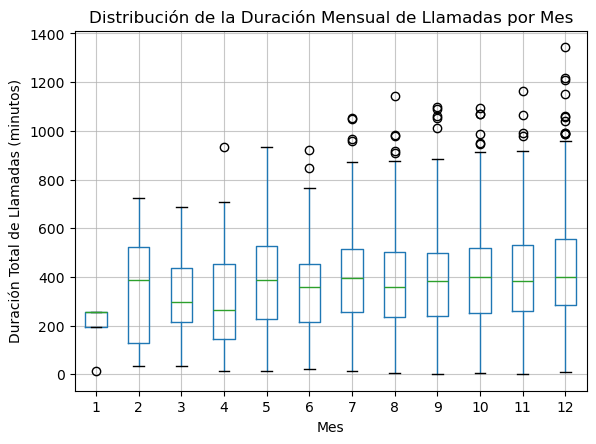

In [64]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(4,4))
consumo_mensual.boxplot(column='minutes', by='month')
plt.title('Distribución de la Duración Mensual de Llamadas por Mes')
plt.suptitle('')  # Elimina el título automático generado por boxplot
plt.xlabel('Mes')
plt.ylabel('Duración Total de Llamadas (minutos)')
plt.grid(alpha=0.7)
plt.show()

**Conclusion sobre comportamiento de clientes respecto a las llamadas**

Se puede observar que la distribucion de la duracion de las llamadas es amplia, ya que muestran una concentracion en su mayoria entre los 200 y los 600 minutos mensuales en promedio durante casi todo el año, aunque a partir del mes 7 (Julio), parece haber excepciones en las que se encuentran valores mas elevados de llamadas, sin embargo, estos valores atipicos pudieran deberse a diversas situaciones que no podemos explicar a simple vista, aunque puede deberse a la temporada del año
El comportamiento conforme al plan parece ser uniforme ya que en su mayoria se observan concentrados en la parte baja del grafico

### Mensajes

In [65]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_mes = consumo_mensual_plan.groupby(['plan', 'month'])['messages'].sum().reset_index()

display(mensajes_mes)

,plan,month,messages
0,surf,1,21
1,surf,2,108
2,surf,3,351
3,surf,4,864
4,surf,5,1778
5,surf,6,2292
6,surf,7,3096
7,surf,8,4439
8,surf,9,5672
9,surf,10,7507


In [66]:
#Comparacion de la tendencia respecto a cada plan por mes por mensajes
consumo_mensual_plan.groupby(['user_id', 'plan', 'month'])['messages'].sum().reset_index()
tendencia_mensual_mensajes = consumo_mensual.groupby(['plan', 'month'])['messages'].agg(['sum','mean','std','max'])
display(tendencia_mensual_mensajes)

sum       mean        std  max
plan     month                                  
surf     1         21  21.000000        NaN   21
         2        108  21.600000  22.645088   58
         3        351  21.937500  18.763329   59
         4        864  24.685714  23.232547  120
         5       1778  33.547170  29.810663  149
         6       2292  32.742857  28.602060  132
         7       3096  34.786517  28.042772  164
         8       4439  37.302521  30.840364  156
         9       5672  38.585034  29.957697  153
         10      7507  41.475138  34.632927  224
         11      8739  40.087156  30.852208  180
         12     11731  47.686992  36.605615  266
ultimate 1         62  20.666667  17.616280   37
         2        139  27.800000  23.015212   67
         3        243  34.714286  24.777102   72
         4        463  28.937500  22.646468   77
         5        931  44.333333  35.311943  149
         6       1374  37.135135  28.314859  143
         7       1937  41.212766  29.293074  149
         8       2732  47.929825  32.161901  151
         9       3259  45.901408  30.056212  155
         10      4179  47.488636  32.987282  153
         11      4861  47.656863  33.178036  166
         12      6718  53.744000  37.150718  150

<Figure size 400x400 with 0 Axes>

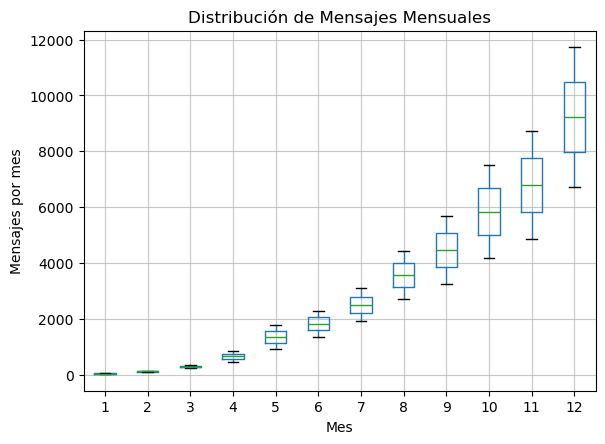

In [67]:
#Aplicamos diagrama de cajas, con ello podemos ver la distribucion entre planes y uso de mensajes por mes
plt.figure(figsize=(4,4))
mensajes_mes.boxplot(column='messages', by='month')
plt.title('Distribución de Mensajes Mensuales')
plt.suptitle('')  # Elimina el título automático generado por boxplot
plt.xlabel('Mes')
plt.ylabel('Mensajes por mes')
plt.grid(alpha=0.7)
plt.show()

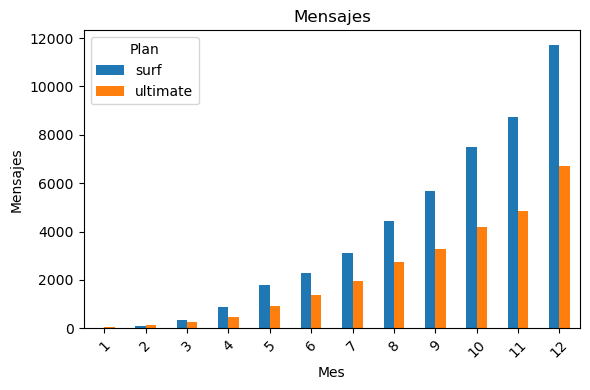

In [68]:
#Tabla pivot, comparamos valores entre planes
mensajes_mes.pivot(index='month', columns='plan', values='messages').plot(
    kind='bar',
    figsize=(6, 4),
    title='Mensajes',
    xlabel='Mes',
    ylabel='Mensajes',
    rot=45  # Rotar las etiquetas del eje x para mejor legibilidad
)

plt.legend(title='Plan')
plt.tight_layout()
plt.show()

**Conclusion sobre el uso de mensajes por los clientes**

Se observa una tendencia con aumento conforme avanzan los meses, siendo en escencia grafica y numerica, el mes de diciembre el que mayor cantidad de uso de mensajes se observa
Sin embargo, parece ser que no tiene que ver el plan que manejen los clientes, ya que en ambos casos, se observa la misma tendencia, aunque parece ser que los clientes con Plan Surf, utilizan mas que los del Plan Ultimate

In [69]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

consumo_mensual_plan.head()

,user_id,plan,month,calls_user,minutes,messages,mb,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,plan_name,gb_month_included,excedente_minutos,costo_excedente_minutos,excedente_mensajes,costo_excedente_mensajes,excedente_gb,costo_excedente_gb
0,1000,ultimate,12,16,108,11,1899,1000,30720,3000,...,1,1,ultimate,30.0,0,0,0,0,0,0
1,1001,surf,8,27,160,30,6908,50,15360,500,...,3,3,surf,15.0,0,0,0,0,0,0
2,1001,surf,9,49,278,44,13294,50,15360,500,...,3,3,surf,15.0,0,0,0,0,0,0
3,1001,surf,10,65,348,53,22308,50,15360,500,...,3,3,surf,15.0,0,0,3,9,6948,69480
4,1001,surf,11,64,379,36,18477,50,15360,500,...,3,3,surf,15.0,0,0,0,0,3117,31170


In [70]:
#Convertimos valor de mb a gb
mb_mes = consumo_mensual_plan.groupby(['plan', 'month'])['mb'].sum().reset_index()
mb_mes['gb'] = mb_mes['mb']/1024
display(mb_mes)

,plan,month,mb,gb
0,surf,1,7885,7.700195
1,surf,2,46494,45.404297
2,surf,3,198133,193.489258
3,surf,4,414288,404.578125
4,surf,5,786221,767.793945
5,surf,6,1088293,1062.786133
6,surf,7,1485353,1450.540039
7,surf,8,2039899,1992.088867
8,surf,9,2421581,2364.825195
9,surf,10,3146810,3073.056641


### Internet

In [71]:
#Internet
#Conocemos el total mensual de mb usados y aplicamos valores estadisticos por mes por plan
consumo_mensual_plan.groupby(['user_id', 'plan', 'month'])['mb'].sum().reset_index()
tendencia_mensual_mb = consumo_mensual.groupby(['plan', 'month'])['mb'].agg(['sum','mean','max'])
display(tendencia_mensual_mb)

sum          mean    max
plan     month                              
surf     1         7885   7885.000000   7885
         2        46494   9298.800000  16298
         3       198133  12383.312500  20894
         4       414288  11836.800000  28478
         5       786221  14834.358491  36642
         6      1088293  15547.042857  37069
         7      1485353  16689.359551  38896
         8      2039899  17142.008403  49904
         9      2421581  16473.340136  35897
         10     3146810  17385.690608  42084
         11     3549198  16280.724771  40184
         12     4414957  17946.979675  70866
ultimate 1        20841   6947.000000  10626
         2        86584  17316.800000  21573
         3       166678  23811.142857  36030
         4       228314  14269.625000  37727
         5       356459  16974.238095  32877
         6       571042  15433.567568  37876
         7       774534  16479.446809  38794
         8      1023481  17955.807018  40354
         9      1163792  16391.436620  37551
         10     1539354  17492.659091  46551
         11     1764990  17303.823529  42913
         12     2280707  18245.656000  44978

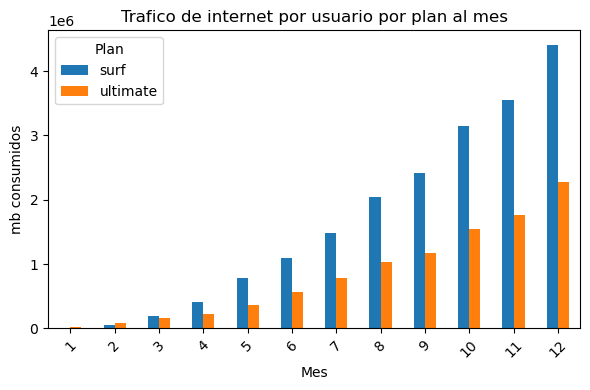

In [72]:
#Aplicamos una tabla pivot, para organizar los datos y poder compararlos en la misma grafica
mb_mes.pivot(index='month', columns='plan', values='mb').plot(kind='bar',
                                                              figsize=(6, 4),
                                                              title='Trafico de internet por usuario por plan al mes',
                                                              xlabel='Mes',
                                                              ylabel='mb consumidos',
                                                              rot=45)

plt.legend(title='Plan')
plt.tight_layout()
plt.show()

Conclusion trafico internet

Se observa una tendencia en aumento del consumo de internet por parte de los clientes, en ambos planes, pero en el caso de los usuarios del plan SUrf, parece ser que su consumo es mayor, a excepcion del mes de enero y febrero donde el trafico de internet es mayor para los usuarios del Plan Ultimate

## Ingreso

In [73]:
#Se detallan por separado, estadisticas para cada df, llamadas, mensajes y consumo de internet, con el objetivo de conocer de cada uno
# las estadisticas referentes a los costos mensuales para cada uno, con ello se pueden dar a conocer las ventajas de uno frente a otro
estadistica_llamadas = consumo_mensual_plan.groupby(['plan_name', 'month'])[['excedente_minutos', 'costo_excedente_minutos']].agg(
    ['count','mean','max'])
estadistica_llamadas
#display(consumo_mensual_plan[['minutes', 'minutes_included', 'excedente_minutos', 'usd_per_minute', 'costo_excedente_minutos']].sample(10))

excedente_minutos                 costo_excedente_minutos  \
                            count       mean  max                   count   
plan_name month                                                             
surf      1                     1   0.000000    0                       1   
          2                     5  44.600000  223                       5   
          3                    16  21.062500  189                      16   
          4                    35  26.057143  434                      35   
          5                    53  41.773585  435                      53   
          6                    70  33.614286  421                      70   
          7                    89  49.617978  550                      89   
          8                   119  37.327731  481                     119   
          9                   147  29.666667  562                     147   
          10                  181  39.392265  594                     181   
          11                  218  38.550459  662                     218   
          12                  246  61.085366  844                     246   
ultimate  1                     3   0.000000    0                       3   
          2                     5   0.000000    0                       5   
          3                     7   0.000000    0                       7   
          4                    16   0.000000    0                      16   
          5                    21   0.000000    0                      21   
          6                    37   0.000000    0                      37   
          7                    47   0.000000    0                      47   
          8                    57   0.000000    0                      57   
          9                    71   0.000000    0                      71   
          10                   88   0.000000    0                      88   
          11                  102   0.000000    0                     102   
          12                  125   0.000000    0                     125   

                                   
                       mean   max  
plan_name month                    
surf      1        0.000000     0  
          2      133.800000   669  
          3       63.187500   567  
          4       78.171429  1302  
          5      125.320755  1305  
          6      100.842857  1263  
          7      148.853933  1650  
          8      111.983193  1443  
          9       89.000000  1686  
          10     118.176796  1782  
          11     115.651376  1986  
          12     183.256098  2532  
ultimate  1        0.000000     0  
          2        0.000000     0  
          3        0.000000     0  
          4        0.000000     0  
          5        0.000000     0  
          6        0.000000     0  
          7        0.000000     0  
          8        0.000000     0  
          9        0.000000     0  
          10       0.000000     0  
          11       0.000000     0  
          12       0.000000     0

In [81]:
estadistica_mensajes = consumo_mensual_plan.groupby(['plan_name', 'month'])[['excedente_mensajes', 'costo_excedente_mensajes']].agg(
    ['count','mean','max'])
estadistica_mensajes

excedente_mensajes                 costo_excedente_mensajes  \
                             count       mean  max                    count   
plan_name month                                                               
surf      1                      1   0.000000    0                        1   
          2                      5   1.600000    8                        5   
          3                     16   0.812500    9                       16   
          4                     35   2.485714   70                       35   
          5                     53   6.056604   99                       53   
          6                     70   5.714286   82                       70   
          7                     89   5.494382  114                       89   
          8                    119   7.411765  106                      119   
          9                    147   7.367347  103                      147   
          10                   181   9.977901  174                      181   
          11                   218   8.412844  130                      218   
          12                   246  13.000000  216                      246   
ultimate  1                      3   0.000000    0                        3   
          2                      5   0.000000    0                        5   
          3                      7   0.000000    0                        7   
          4                     16   0.000000    0                       16   
          5                     21   0.000000    0                       21   
          6                     37   0.000000    0                       37   
          7                     47   0.000000    0                       47   
          8                     57   0.000000    0                       57   
          9                     71   0.000000    0                       71   
          10                    88   0.000000    0                       88   
          11                   102   0.000000    0                      102   
          12                   125   0.000000    0                      125   

                                 
                      mean  max  
plan_name month                  
surf      1       0.000000    0  
          2       4.800000   24  
          3       2.437500   27  
          4       7.457143  210  
          5      18.169811  297  
          6      17.142857  246  
          7      16.483146  342  
          8      22.235294  318  
          9      22.102041  309  
          10     29.933702  522  
          11     25.238532  390  
          12     39.000000  648  
ultimate  1       0.000000    0  
          2       0.000000    0  
          3       0.000000    0  
          4       0.000000    0  
          5       0.000000    0  
          6       0.000000    0  
          7       0.000000    0  
          8       0.000000    0  
          9       0.000000    0  
          10      0.000000    0  
          11      0.000000    0  
          12      0.000000    0

In [82]:
estadistica_internet = consumo_mensual_plan.groupby(['plan_name', 'month'])[['excedente_gb', 'costo_excedente_gb']].agg(
    ['count','mean','std','max'])
estadistica_internet

excedente_gb                                   \
                       count         mean          std    max   
plan_name month                                                 
surf      1                1     0.000000          NaN      0   
          2                5   187.600000   419.486353    938   
          3               16  1534.187500  2032.274168   5534   
          4               35  1774.800000  3474.426443  13118   
          5               53  2692.037736  4625.827606  21282   
          6               70  2756.728571  4787.899370  21709   
          7               89  3711.280899  5559.767644  23536   
          8              119  4010.873950  5650.547330  34544   
          9              147  3287.544218  4366.528304  20537   
          10             181  4042.082873  5322.650210  26724   
          11             218  3285.426606  4569.617452  24824   
          12             246  4265.390244  6114.895735  55506   
ultimate  1                3     0.000000     0.000000      0   
          2                5     0.000000     0.000000      0   
          3                7   837.000000  1976.977070   5310   
          4               16   437.937500  1751.750000   7007   
          5               21   102.714286   470.695989   2157   
          6               37   272.756757  1259.141802   7156   
          7               47   338.212766  1621.840942   8074   
          8               57   335.736842  1549.198555   9634   
          9               71   180.042254   960.262768   6831   
          10              88   291.409091  1862.193884  15831   
          11             102   290.000000  1501.704062  12193   
          12             125   363.616000  1706.874293  14258   

                costo_excedente_gb                                      
                             count          mean           std     max  
plan_name month                                                         
surf      1                      1      0.000000           NaN       0  
          2                      5   1876.000000   4194.863526    9380  
          3                     16  15341.875000  20322.741685   55340  
          4                     35  17748.000000  34744.264427  131180  
          5                     53  26920.377358  46258.276056  212820  
          6                     70  27567.285714  47878.993697  217090  
          7                     89  37112.808989  55597.676435  235360  
          8                    119  40108.739496  56505.473300  345440  
          9                    147  32875.442177  43665.283038  205370  
          10                   181  40420.828729  53226.502096  267240  
          11                   218  32854.266055  45696.174518  248240  
          12                   246  42653.902439  61148.957348  555060  
ultimate  1                      3      0.000000      0.000000       0  
          2                      5      0.000000      0.000000       0  
          3                      7   5859.000000  13838.839487   37170  
          4                     16   3065.562500  12262.250000   49049  
          5                     21    719.000000   3294.871925   15099  
          6                     37   1909.297297   8813.992615   50092  
          7                     47   2367.489362  11352.886593   56518  
          8                     57   2350.157895  10844.389882   67438  
          9                     71   1260.295775   6721.839377   47817  
          10                    88   2039.863636  13035.357186  110817  
          11                   102   2030.000000  10511.928432   85351  
          12                   125   2545.312000  11948.120049   99806

**Conclusiones sobre ingreso en planes**

Parece ser que los planes muestran algunas diferencias a simple vista en los montos de ingreso excedente, al presentar mayores ingresos los usuarios del Plan Surf, por tanto pareciera, que es mas conveniente conservar a los usuarios con esta tarifa ya que comunmente exceden los costos del plan, aunque no se puede dejar de lado, la situacion de que los usuarios del plan Ultimate muestran tambien excedentes en costo bastante considerables, lo que puede ser benefico para la compania

La combinación de estadísticas por categoría y mes junto con visualizaciones refuerza el comportamiento de los usuarios y el valor económico de cada plan.

## Prueba las hipótesis estadísticas

In [76]:
# Prueba las hipótesis
#aplicamos promedio a costo excedente en minutos, agrupado por users y plan
promedio_llamadas = consumo_mensual_plan.groupby(['user_id','plan_name'])['costo_excedente_minutos'].mean().reset_index()
promedio_llamadas

,user_id,plan_name,costo_excedente_minutos
0,1000,ultimate,0.00
1,1001,surf,0.00
2,1002,surf,0.00
3,1003,surf,1461.00
4,1004,surf,0.00
...,...,...,...
388,1491,surf,8.25
389,1492,surf,0.00
390,1494,surf,29.00
391,1496,surf,0.00


In [77]:
#Separar los ingresos para los usuarios de los planes Ultimate y Surf
ultimate = promedio_llamadas[promedio_llamadas['plan_name'] == 'ultimate']['costo_excedente_minutos'].dropna()
surf = promedio_llamadas[promedio_llamadas['plan_name'] == 'surf']['costo_excedente_minutos'].dropna()

alpha = 0.05  # el nivel de significancia

results = st.ttest_ind(ultimate, surf, equal_var=False)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  3.372448153476839e-13
Rechazamos la hipótesis nula


**Hipotesis sobre el promedio de usuarios de NY-NJ city**

In [78]:
#Filtramos para conocer una muestra de los usuarios que pertenecen a NY-NJ
#users.sample(30)
ny_nj_users = users[users['city'].str.contains(r'NY|NJ', case=False)]
ny_nj_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,unknomwn
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,unknomwn
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07 00:00:00
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,unknomwn
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,unknomwn


In [83]:
#Se agrega una nueva columna al Df de consumo mensual con la suma total de los costos en general para ambos planes
consumo_mensual_plan['costos_totales'] = (
    consumo_mensual_plan['costo_excedente_minutos'].fillna(0) +
    consumo_mensual_plan['costo_excedente_mensajes'].fillna(0) +
    consumo_mensual_plan['costo_excedente_gb'].fillna(0)
)
consumo_mensual_plan[['user_id','plan','costos_totales']]

,user_id,plan,costos_totales
0,1000,ultimate,0
1,1001,surf,0
2,1001,surf,0
3,1001,surf,69489
4,1001,surf,31170
...,...,...,...
1754,1496,surf,10100
1755,1496,surf,0
1756,1496,surf,0
1757,1496,surf,10590


In [80]:
#Anotaciones sobre el proceso de desglose de hipotesis
#En este caso se agrega una nueva columna al DF users, haciendo referencia a los que se encuentran en NY-NJ, se borran posibles valores
# que puedan interferir con los valores correspondientes a los usuarios de NY-NJ 
#se crean dos nuevos Df, con referencia a los usuarios de nY-NJ con la nueva columna y se conjugan ambos DF users y consumo mensual plan

users ['is_ny_nj'] = users['city'].str.contains('NY-NJ', case=False, na=False) 
consumo_mensual_plan = consumo_mensual_plan.drop(columns=['is_ny_nj_x'], errors='ignore')

consumo_mensual_plan = consumo_mensual_plan.merge(users[['user_id', 'is_ny_nj']], on='user_id',how='left')

ny_nj = consumo_mensual_plan[consumo_mensual_plan['is_ny_nj'] == True]

no_ny_nj = consumo_mensual_plan[consumo_mensual_plan['is_ny_nj'] == False]

ingreso_mensual_nynj = ny_nj['costos_totales']
ingreso_mensual_otras_regiones = no_ny_nj['costos_totales']

alpha = 0.05
results = st.ttest_ind(ingreso_mensual_nynj, ingreso_mensual_otras_regiones,equal_var=False)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print(results.pvalue)

No podemos rechazar la hipótesis nula
0.6132314930639555


## Conclusión general

**CONSUMO DE DATOS**

La tendencia en ambos planes para cualquiera de los servicios que maneja la compañía (MINUTOS, MENSAJES, MB) muestra un incremento conforme avanza el año, iniciando con los valores mas bajos en enero, sin embargo, no hay suficiente informacion en ese sentido para definir a que se debe esa tendencia

**DISPERSION DE VALORES**

Parece ser a simple vista y con base en los datos, que en su mayoría se mantienen uniformes en la parte media del grafico, de forma general, sin embargo, en algunos casos especificos, muestran un comportamiento distante (valores atipicos), sobre todo para los usuarios del plan Ultimate, en la segunda mitad del año, estos valores atipicos se muestran en la parte alta (aumento), lo que indica un mayor consumo en los servicios, por encima de los usuarios del plan Surf

**DIFERENCIAS DE COSTOS EN LOS PLANES**

Parece ser, que los niveles en los costos, por consiguiente, en los excedentes de antemano, en su mayoria corresponden a los usuarios del ppan SURF, los cuales reflejan un mayor consumo en 3/4 partes del año, mostrandose muy por encima de los valores arrojados por los usuarios del Plan mas caro, Ultimate 

**CONSIDERACIONES SOBRE LAS METRICAS PARA DETERMINAR LAS EVALUACIONES**

Conforme se fueron conociendo los valores y los datos de las diferentes tablas, se pudo ver cada vez de forma mas clara la tendencia hacia la cual se dirirgia la atencion para poder utilizar diferentes metodos y metricas que permitieran desarrollar las formulas necesarias para desglosar la informacion

**COMPARATIVA DE COSTOS DE CADA PLAN**

Los datos fueron analizados desde el inicio considerando los costos y el consumo por parte del cliente
Al inicio, pareceria que el plan que tendria mayor beneficio en cuanto a consumo y costo, seria el plan Surf(sencillo), por los precios que maneja, y debido al costo del Plan Ultimate, sin embargo, una vez observando los datos, el costo beneficio parec
El consumo de los clientes en general tiene un aumento exponencial conforme avanza el año, tanto en llamadas, mensajes e internet
Los clientes que cuentan con el plan Surf,parecen tener un mayor consumo en general respecto a los clientes que manejan el plan Ultimate
Al ser un plan mas austero para el consumidor por los costos, el consumidor puede
pareciera ser un plan que deja mayor margen de ganancia y se puede entender como que es el que mas conviene a la compañia, ya que, por los precios que maneja, se entiende que es mas barato, sin embargo, el consumo favorece que el gasto sea mayor debido a los margenes limitados en el plan, aunque a simple vista es menos costoso, la compensacion por el excedente de consumo y por tanto en el cobro del mismo tiene un mayor aporte a

**HIPOTESIS**

En el caso de los usuarios y la comparativa entre ambos planes, la hipotesis fue rechazada, indicando que no existen diferencias significativas entre los ingresos de los usuarios entre ambos planes
En el segundo caso, para los usuarios que radican en la ciudad de NY-NJ, en comparacion con las demas regiones, parece haber diferencias siginificativas estadisticamente dado que la hipotesis no se puede rechazar